<a href="https://colab.research.google.com/github/VanTrung3007/AI/blob/main/%C4%90KMobileRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 40.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fdacb2e17926e21a21baff83beee23382b75d9db3a375a2a9fff88855781dac1
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


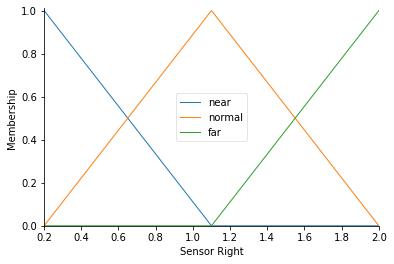

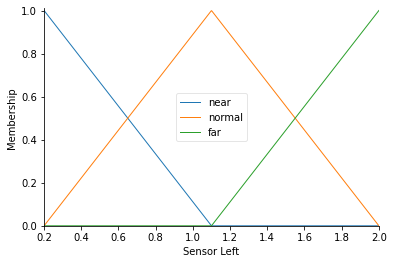

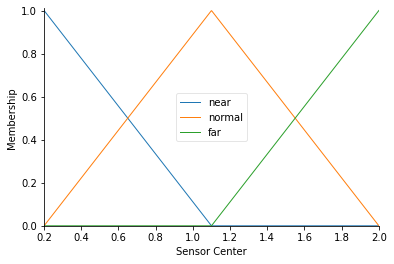

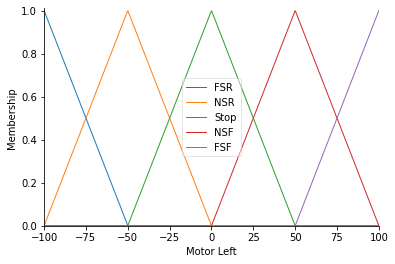

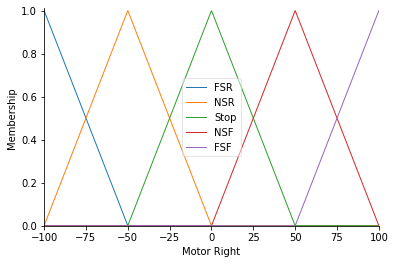

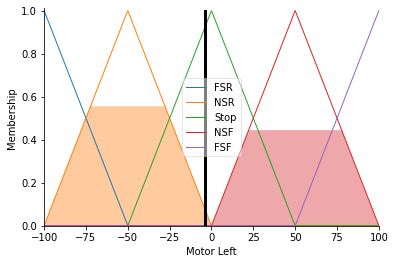

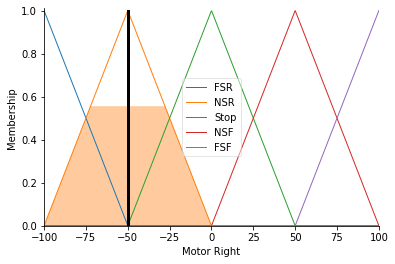

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universeSS = np.linspace(0.2,2,1000)
universeM = np.linspace(-100,100,1000)

#Input
SR=ctrl.Antecedent(universeSS,'Sensor Right')
SL=ctrl.Antecedent(universeSS,'Sensor Left')
SC=ctrl.Antecedent(universeSS,'Sensor Center')
#Output
ML=ctrl.Consequent(universeM,'Motor Left')
MR=ctrl.Consequent(universeM,'Motor Right')

nameSS=['near','normal','far']
nameM=['FSR','NSR','Stop','NSF','FSF']

SR.automf(names=nameSS)
SL.automf(names=nameSS)
SC.automf(names=nameSS)
ML.automf(names=nameM)
MR.automf(names=nameM)

ruleML = []
ruleMR = []
#Rule ML
ruleML.append(ctrl.Rule(antecedent=((SL['far'] & SC['far']& SR['far'])|(SL['normal'] & SC['far']& SR['far'])|(SL['normal'] & SC['far']& SR['normal'])|
                                  (SL['normal'] & SC['far']& SR['near'])|(SL['near'] & SC['far']& SR['far'])|(SL['near'] & SC['far']& SR['normal'])|
                                  (SL['near'] & SC['far']& SR['near'])),consequent=ML['FSF'],label='rule FSF'))
ruleML.append(ctrl.Rule(antecedent=((SL['far'] & SC['normal']& SR['far'])|(SL['far'] & SC['far']& SR['normal'])|(SL['far'] & SC['normal']& SR['normal'])|
                                  (SL['normal'] & SC['normal']& SR['far'])|(SL['normal'] & SC['near']& SR['far'])|(SL['normal'] & SC['near']& SR['normal'])|
                                  (SL['near'] & SC['normal']& SR['far'])|(SL['near'] & SC['near']& SR['far'])|(SL['near'] & SC['normal']& SR['normal'])|
                                  (SL['near'] & SC['normal']& SR['near'])|(SL['near'] & SC['near']& SR['normal'])),consequent=ML['NSF'],label='rule NSF'))
ruleML.append(ctrl.Rule(antecedent=((SL['far'] & SC['far']& SR['near'])|(SL['far'] & SC['near']& SR['far'])|(SL['far'] & SC['near']& SR['normal'])|
                                  (SL['far'] & SC['normal']& SR['near'])|(SL['far'] & SC['near']& SR['near'])|(SL['normal'] & SC['normal']& SR['normal'])|
                                  (SL['normal'] & SC['normal']& SR['near'])|(SL['normal'] & SC['near']& SR['near'])),consequent=ML['NSR'],label='rule NSR'))
ruleML.append(ctrl.Rule(antecedent=((SL['near'] & SC['near']& SR['near'])),consequent=ML['FSR'],label='rule FSR'))
#Rule MR
ruleMR.append(ctrl.Rule(antecedent=((SL['far'] & SC['far']& SR['far'])|(SL['far'] & SC['far']& SR['normal'])|(SL['far'] & SC['normal']& SR['normal'])|
                                  (SL['normal'] & SC['far']& SR['normal'])|(SL['normal'] & SC['far']& SR['near'])|(SL['near'] & SC['far']& SR['normal'])|
                                  (SL['near'] & SC['far']& SR['near'])),consequent=MR['FSF'],label='rule FSF'))
ruleMR.append(ctrl.Rule(antecedent=((SL['far'] & SC['normal']& SR['far'])|(SL['far'] & SC['far']& SR['near'])|(SL['far'] & SC['near']& SR['far'])|
                                  (SL['far'] & SC['near']& SR['normal'])|(SL['far'] & SC['normal']& SR['near'])|(SL['far'] & SC['near']& SR['near'])|
                                  (SL['normal'] & SC['far']& SR['far'])|(SL['normal'] & SC['normal']& SR['near'])|(SL['normal'] & SC['near']& SR['near'])|
                                  (SL['near'] & SC['far']& SR['far'])|(SL['near'] & SC['normal']& SR['near'])),consequent=MR['NSF'],label='rule NSF'))
ruleMR.append(ctrl.Rule(antecedent=((SL['normal'] & SC['normal']& SR['far'])|(SL['normal'] & SC['near']& SR['far'])|(SL['normal'] & SC['normal']& SR['normal'])|
                                  (SL['normal'] & SC['near']& SR['normal'])|(SL['near'] & SC['normal']& SR['far'])|(SL['near'] & SC['near']& SR['far'])|
                                  (SL['near'] & SC['normal']& SR['normal'])|(SL['near'] & SC['near']& SR['normal'])),consequent=MR['NSR'],label='rule NSR'))
ruleMR.append(ctrl.Rule(antecedent=((SL['near'] & SC['near']& SR['near'])),consequent=MR['FSR'],label='rule FSR'))

#Control system
motorL_ctrl = ctrl.ControlSystem(ruleML)
motorL_simulation=ctrl.ControlSystemSimulation(motorL_ctrl)
motorR_ctrl = ctrl.ControlSystem(ruleMR)
motorR_simulation=ctrl.ControlSystemSimulation(motorR_ctrl)
# Compute
motorL_simulation.input['Sensor Right'] = motorR_simulation.input['Sensor Right'] = 1.5
motorL_simulation.input['Sensor Left'] = motorR_simulation.input['Sensor Left'] = 0.8
motorL_simulation.input['Sensor Center'] = motorR_simulation.input['Sensor Center'] = 0.8

motorR_simulation.compute()
motorL_simulation.compute()

SR.view()
SL.view()
SC.view()
ML.view()
MR.view()

# power
ML.view(sim = motorL_simulation)
MR.view(sim = motorR_simulation)

